In [119]:
import numpy as np
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams

In [120]:
# Problem 1
text = 'data science professionals have promising career path'.split()

In [121]:
def make_df(window):
  window = np.asarray(window)
  df = pd.DataFrame({"input": window[:,0], "label": window[:,1]})
  return df

In [122]:
window1, output1 = skipgrams(text, vocabulary_size=2, window_size=1, shuffle=False, negative_samples=0)
window1_df = make_df(window1)
window1_df

,input,label
0,data,science
1,science,data
2,science,professionals
3,professionals,science
4,professionals,have
5,have,professionals
6,have,promising
7,promising,have
8,promising,career
9,career,promising


In [123]:
window2, output2 = skipgrams(text, vocabulary_size=2, window_size=2, shuffle=False, negative_samples=0)
window2_df = make_df(window2)
window2_df

,input,label
0,data,science
1,data,professionals
2,science,data
3,science,professionals
4,science,have
5,professionals,data
6,professionals,science
7,professionals,have
8,professionals,promising
9,have,science


In [124]:
window3, output3 = skipgrams(text, vocabulary_size=2, window_size=3, negative_samples=0.0, shuffle=False)
window3_df = make_df(window3)
window3_df

,input,label
0,data,science
1,data,professionals
2,data,have
3,science,data
4,science,professionals
5,science,have
6,science,promising
7,professionals,data
8,professionals,science
9,professionals,have


In [125]:
# Problem 2
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

input = ohe.fit_transform(window2_df['input'].values.reshape(-1,1))
input = input.toarray()
label = ohe.fit_transform(window2_df['label'].values.reshape(-1,1))
label = label.toarray()
print("Input:\n", input, "\n")
print("Label:\n", label)

Input:
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]] 

Label:
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0

In [126]:
# Problem 3
tokenizer = TreebankWordTokenizer()

corpus = ['I like deep learning', 
          'I like NLP',
          'I enjoy flying']
corpus = [tokenizer.tokenize(i) for i in corpus]

new_corpus = []
for i in corpus:
  for j in i:
    new_corpus.append(j)

window2_corpus, _ = skipgrams(new_corpus, vocabulary_size=2, window_size=2, negative_samples=0.0, shuffle=False)
window2_corpus_df = make_df(window2_corpus)

input = ohe.fit_transform(window2_corpus_df['input'].values.reshape(-1,1))
input = input.toarray()
label = ohe.fit_transform(window2_corpus_df['label'].values.reshape(-1,1))
label = label.toarray()
print("Input:\n", input, "\n")
print("Label:\n", label)

Input:
 [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]] 

Label:
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1

In [127]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [128]:
model = Sequential()
model.add(Dense(units=2, input_dim=input.shape[1], activation='linear'))
model.add(Dense(2, activation='linear'))
model.add(Dense(label.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 2)                 16        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 21        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [129]:
history = model.fit(input, label, verbose=0, epochs=200)

In [130]:
for layerNum, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print("Weights:\n", weights, "\n")
  print("Biases:\n", biases)
  break

Weights:
 [[-0.32298693 -0.42193756]
 [ 0.08574343  0.8015037 ]
 [ 0.134036   -0.03121337]
 [-0.10040674  0.22407903]
 [-0.56978357  0.74871427]
 [-0.9941501   0.5630254 ]
 [ 0.25705883 -0.4310158 ]] 

Biases:
 [-0.06614978  0.1040059 ]


In [131]:
Word2Vec = weights + biases
w2v_df = pd.DataFrame(Word2Vec, columns=['x1', 'x2'])
w2v_df['words'] = np.unique(new_corpus)

In [132]:
w2v_df

,x1,x2,words
0,-0.389137,-0.317932,I
1,0.019594,0.905510,NLP
2,0.067886,0.072793,deep
3,-0.166557,0.328085,enjoy
4,-0.635933,0.852720,flying
5,-1.060300,0.667031,learning
6,0.190909,-0.327010,like


In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

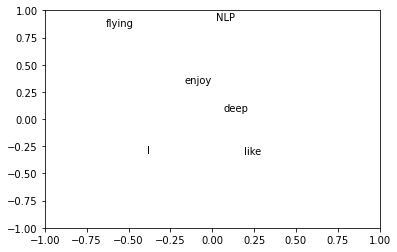

In [134]:
fig, ax = plt.subplots()
for word, x1, x2 in zip(w2v_df['words'], w2v_df['x1'], w2v_df['x2']):
  ax.annotate(word, (x1, x2))

xmin = min(w2v_df['x1'])
xmax = max(w2v_df['x1'])

ymin = min(w2v_df['x2'])
ymax = max(w2v_df['x2'])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()